### Test Hypotesis Method: Sprint 7
___

### Exercise 1: Get a set of sports theme data that you like and select an attribute from the set of data. Calculate the p-value and say if the null hypothesis rebuts the agafant an alpha of 5%.

### Ejercicio 1: Escoge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos. Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

In [239]:
#Importing the librarys to work:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [240]:
#Lets import a Michael Jordan Dataset with some data from 1984 to 2003
df = pd.read_csv('Michael_Jordan_Data.csv')
df.head()

,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Opp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1985,1,1,10/26/1984,21,252,21.689938,CHI,1,WSB,...,1,5,6,7,2,4,5,2,16,12.5
1,1985,2,2,10/27/1984,21,253,21.692676,CHI,0,MIL,...,3,2,5,5,2,1,3,4,21,19.4
2,1985,3,3,10/29/1984,21,255,21.698152,CHI,1,MIL,...,2,2,4,5,6,2,3,4,37,32.9
3,1985,4,4,10/30/1984,21,256,21.700890,CHI,0,KCK,...,2,2,4,5,3,1,6,5,25,14.7
4,1985,5,5,11/1/1984,21,258,21.706366,CHI,0,DEN,...,3,2,5,5,1,1,2,4,17,13.2


In [241]:
#Check how many Row and Columns we got
df.shape

(1072, 33)

In [242]:
#Assing our column to work with and take the mean:
puntos = df['PTS']
puntos_mean = puntos.mean()
puntos_mean


30.12313432835821

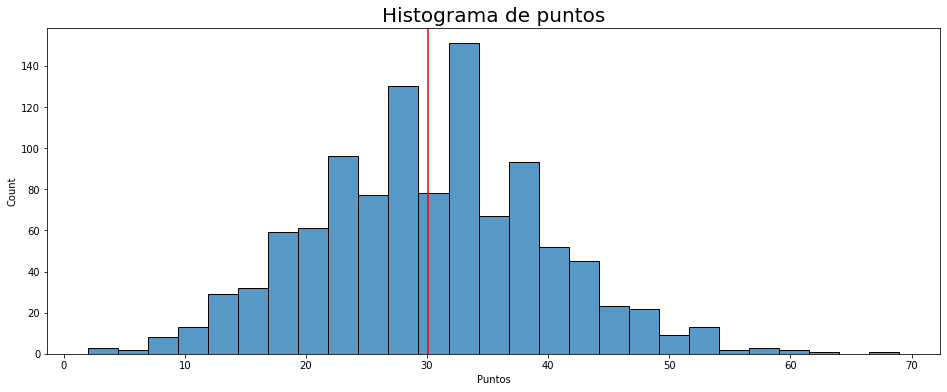

In [243]:
#Lets plot a Historigram to see the distribution of data that the column points ("PTS") have:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='PTS')
#Add the mean line.
plt.axvline(x=puntos_mean, color='red', label='Mean')
plt.title('Histograma de puntos', fontsize=20)
plt.xlabel('Puntos');

### Lets test our Data to discover if 30 points its a true hypotesis:
H 0 : µ = 30 (The mean is equal to 30)

H A : µ ≠ 30 (The mean is not equal to 30)

In [244]:
#Import the libry and test the hypotesis:
from scipy.stats import ttest_1samp
x = df['PTS']
alpha = 0.05
tscore, pvalue = ttest_1samp(x, popmean=30)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)
print('We cant reject H0') if pvalue > alpha else print('We can reject H0')


t Statistic:  0.4134117064682372
P Value:  0.6793877602270157
We cant reject H0


### Because of the p-value of our test (0.067), which is greater than alpha = 0.05, we do not reject the null hypothesis of the test. We do not have enough evidence to say that the point average is 30. Because the probability of rejecting the null hypothesis and that it is correct is too high.

### Debido a que el valor p de nuestra prueba (0.0.67), que es mayor que alfa = 0.05, no rechazamos la hipótesis nula de la prueba. No tenemos evidencia suficiente para decir que el promedio de puntos es distinto a 30. Porque la probabilidad de rechazar la hipotesis nula y que sea correcta es demasiado alta

___
### Exercise 2: Continue with the sports theme dataset and select two other attributes from the dataset. Calculate the p-values ​​and say if they reject the null hypothesis taking an alpha of 5%.
### Ejercicio 2: Continúa con el conjunto de datos de tema deportivo que te guste y selecciona otros dos atributos del conjunto de datos. Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.
___


### Lets try the same but testing a Sample with a fraction of the entire Dataset to discover if the sample show the same points mean.
H 0 : µ = 30 (El promedio de puntos es igual a 30)

H A : µ ≠ 30 (El promedio de puntos distinto a 30)

In [245]:
#Lets Sample the Dataset with a simple random sample just taking a fraction of the entire Dataset.
Random_sample = df.sample(frac=1/4, random_state=42)
Random_sample.head()
Random_sample.shape

(268, 33)

In [246]:
Ran_puntos = Random_sample['PTS']

In [247]:
#Calculate the mean:
Random_mean= Random_sample['PTS'].mean()
Random_mean

29.5

In [248]:
puntos_mean.astype(int)

30

### Lets test our sample to discover if 30 points its a true hypotesis:
H 0 : µ = 30 (The mean is equal to 30)

H A : µ ≠ 30 (The mean is not equal to 30)

In [249]:
alpha = 0.05
tscore, pvalue = ttest_1samp(Random_sample['PTS'], popmean=30)
print('t Statistic: ', tscore)
print('P Value: ', pvalue)
print('We cant reject H0') if pvalue > alpha else print('We can reject H0')

t Statistic:  -0.851494903034784
P Value:  0.39525753680695563
We cant reject H0


### Conlusion: Conclusion: Because the p-value of our test (0.395), which is greater than alpha = 0.05, we do not reject the null hypothesis of the test. Because the probability of rejecting the null hypothesis and that it is correct is too high.
We were able to verify in the t-test that the sample extracted from the original dataset is well distributed, since there is not enough evidence to say that the mean of points is different from the mean of the total population, which is why the conclusion was reached that the extracted sample is trustworthy.

Debido a que el valor p de nuestra prueba (0.395), que es mayor que alfa = 0.05, no rechazamos la hipótesis nula de la prueba, porque la probabilidad de rechazar la hipotesis nula y que sea correcta es demasiado alta. 
Pudimos comprobar en la prueba t que el sample extraido del dataset original está bien distribuido, ya que no hay evidencias suficientes para decir que la media de puntos es distinta a la media del total de la poblacion, por eso se llego a la conlusión de que la muestra extraida es de fiar.
___



### Some charts of the Random Sample points distribution:


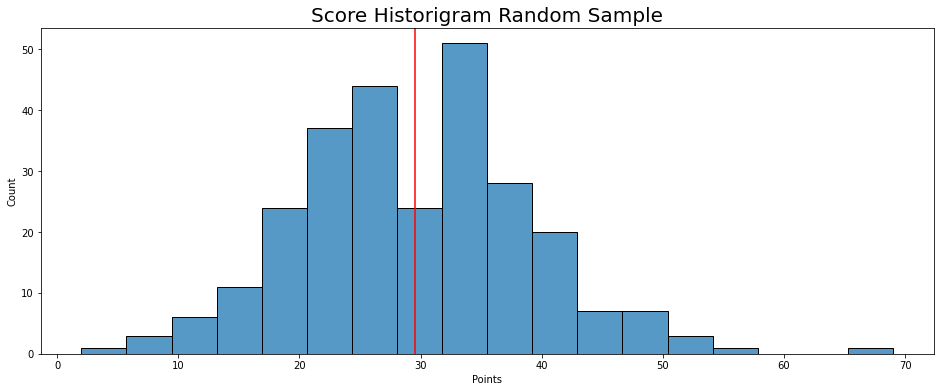

In [250]:
plt.figure(figsize=(16, 6))
sns.histplot(data=Random_sample, x='PTS')
plt.axvline(x=Random_mean, color='red', label='Mean')
plt.title('Score Historigram Random Sample',fontsize=20)
plt.xlabel('Points');

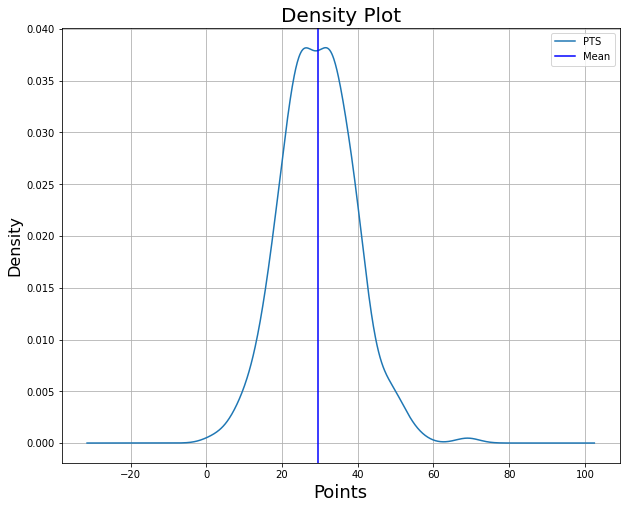

In [251]:
#Density Plot:
plt.figure(figsize=(10,8))
Random_sample['PTS'].plot.kde()
plt.title("Density Plot",  fontsize=20)
plt.xlabel("Points", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()
plt.axvline(x=Random_mean, color='blue', label='Mean')
plt.legend()
plt.show()

### Creating and concatening a new Dataframe to compare the results between our Original DataSet (Sample_a), and the Random Sample (Sample_b)

In [252]:
#Dataframe A (Original DataSet)
puntos_a= puntos
puntos_b=  Ran_puntos
data = {'Sample':'Sample_a', 'Points': puntos_a}
df_sample_a = pd.DataFrame(data=data)
df_sample_a.head(2)




,Sample,Points
0,Sample_a,16
1,Sample_a,21


In [253]:
#Dataframe B (Random Sample DataSet)
puntos_b=  Ran_puntos
data = {'Sample':'Sample_b', 'Points': puntos_b}
df_sample_b = pd.DataFrame(data=data)
df_sample_b.head(2)


,Sample,Points
992,Sample_b,21
746,Sample_b,33


In [254]:
#Lets concatenate both datasets:
df_concat = pd.concat([df_sample_a, df_sample_b])
df_concat

,Sample,Points
0,Sample_a,16
1,Sample_a,21
2,Sample_a,37
3,Sample_a,25
4,Sample_a,17
...,...,...
602,Sample_b,24
450,Sample_b,33
182,Sample_b,36
616,Sample_b,39


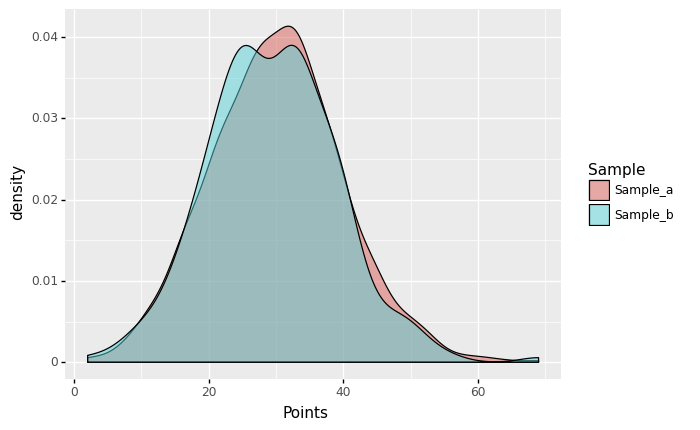

<ggplot: (309809225)>

In [255]:
#Plot a density chart to compare both DataSets:
import plotnine as p9
(p9.ggplot(df_concat)+ p9.aes(x='Points', fill='Sample') + p9.geom_density(alpha=0.5))


### We can see also a normal distribution of our data "Points" wich indicates that our sample have a good  and inclusive distribution of the data.
___